# GPU short course program (7 h)

| Time | Topic  | Type    |
|---:|:-------------|:-----------|
| **Day 1**    |
| 0–20 min | Anaconda, JupyterLab and working with notebooks  | Tasks       |
| 20–40 min | Git, GitHub, and Google Colab  | Tasks       |
| 40–60 min | GPU Hello World with PyCUDA  | Tasks       |
| 1–2 h | Recap on GPU programming  | Lectures       |
| 2–2,5 h | Recap on GPU programming models  | Lectures       |
| 2,5–4,5 h | Exercise 1: Compute pi on the GPU  | Exercise       |
| **Day 2**    |
| 0–1 h | Exercise 2: Simulating heat on the GPU   | Exercise       |
| 1–2 h | Julia  | Lecture + Tasks       |

# Day 1 (4.5 h)

## Anaconda, JupyterLab and working with notebooks (20 min)

**Anaconda** (https://www.anaconda.com/) is an "ecosystem" for Python and R, including a distribution platform (or package manager) for Python and R programming languages.

It allows us to quickly install the necessary software, including Python, and get started with programming for GPUs.

Furtermore, it provides virtual environments, in case you need more than one set of packages. Inside each environment, packages will be compatible.

NOTE 1: What is "conda"? It is i) the `conda` program that installs packages and manages environments, and ii) the conda ecosystem and community.

NOTE 2: Is conda free? The conda-forge channel (add `-c conda-forge` to the install command) is free! The `default` channel may or may not be free:

"conda, the software program for package and environment management, is free to use by anyone.  It’s open source, too.
The conda-compatible packages in conda-forge, Bioconda, and almost all other publicly accessible channels are free to use by any one.
The conda-compatible packages in the default channel and Anaconda Distribution are free to use if:
Your organization has less than 200 people, or
Your organization has 200 or more people, but qualifies as an exempt organization in Anaconda’s terms of service:
Students and educational entities may use our free offerings in curriculum-based courses." *-See https://www.anaconda.com/blog/is-conda-free*

**JupyterLab** (https://jupyter.org/) is a web-based interactive development environment for notebooks, code, and data. Think of it as an integrated development environment (IDE) running in your browser.

"**NumPy** (pronounced /ˈnʌmpaɪ/ NUM-py https://numpy.org/) is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays." *-Wikipedia contributors, "NumPy," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=NumPy&oldid=1264426216 (accessed January 16, 2025).*

**Matplotlib** (https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. We will use the pyplot submodule. Lots of examples can be found at https://matplotlib.org/stable/gallery/index

### Task 1

1. Download and install Anaconda
2. Install the JupyterLab environment
3. Launch JupyterLab
4. Make a new notebook and add one cell with markdown (or $\LaTeX$ ) and one cell with Python-code
5. Make a NumPy array/vector, x, with 20 elements between -1 and 1
6. Import matplotlib.pyplot and plot the functions $f(x)=x^2$ and $g(x)=2x$

### Solution 1

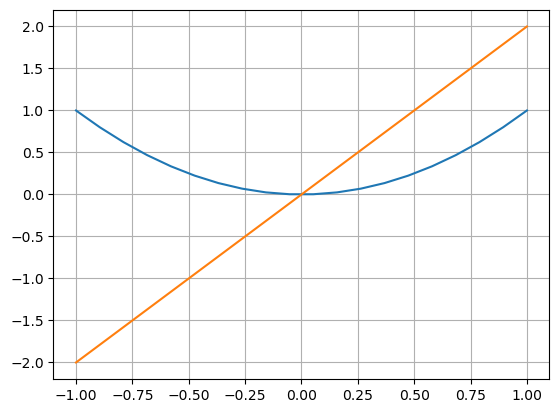

In [1]:
# Task 1.5

import numpy as np

x = np.linspace(-1, 1, 20)

# Task 1.6

import matplotlib.pyplot as plt

def f(x):
    return x*x

plt.plot(x, f(x))

def g(x):
    return 2*x

plt.plot(x, g(x))
plt.grid("on")

## Git, GitHub, and Google Colab (20 min)

**Git** (https://git-scm.com/) is a distributed version control system (also know as a source control management (SCM) tool). It allows multiple copies of your source code *repository*. Git had a lot of functionality (for diffing, branching, merging, rebasing, etc.), see `git --help`. We will fork and clone the repository containing this file, and make commits of our changes.

**nbdime** (https://nbdime.readthedocs.io/en/latest/) allows you to diff notebooks. (Included in the gpu_env.yml conda environment file.)

"**GitHub** (/ˈɡɪthʌb/) is a proprietary developer platform that allows developers to create, store, manage, and share their code. It uses Git to provide distributed version control and GitHub itself provides access control, bug tracking, software feature requests, task management, continuous integration, and wikis for every project. Headquartered in California, it has been a subsidiary of Microsoft since 2018." *-Wikipedia contributors, "GitHub," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=GitHub&oldid=1269115767 (accessed January 16, 2025).*

It is basically cloud-based hosting for Git repositories.

**Google Colab** is a hosted Jupyter Notebook service that requires no setup to use and provides free access to computing resources, including GPUs and TPUs. You need a Google account (GMail, etc.) to access the service.

### Task 2

1. Install Git on your computer 
2. Make an account on GitHub if you do not already have one
3. Login to GitHub, navigate to https://github.com/setmar/gpu-short-course and fork this repository
4. Use Git to clone your newly forked repository to your own computer
5. Add the Jupyter Notebook created in Task 1.4–1.6, make a commit and push to your GitHub-repo
6. Login with you Google account (or make one if you do not already have one and go to https://colab.google.com/
7. Go to settings (the cogwheel in the top-right corner) -> GitHub and authorize GitHub (also check the "Access to private repos" if your repo is private)
8. Open the `hello_world_pycuda.ipynb` notebook
9. Choose the T4 runtime (the small arrow between RAM/Disk usage and "Gemini")

### Note
A locally hosted Git-repo may be added to GitHub like described on https://docs.github.com/en/migrations/importing-source-code/using-the-command-line-to-import-source-code/adding-locally-hosted-code-to-github

### Solution 2

**Task 1.4**

`git clone <URL to your repository>` (will clone the repo to your current directory)

You might have to make a new SSH key to authenticate with GitHub. Open the Git shell and run: 

```sh
ssh-keygen -t rsa -C "your_email@example.com"
notepad ~/.ssh/id_rsa.pub
```

Then, on GitHub.com, go to Settings and then SSH and GPG Keys. Click New SSH key. Enter a title to identify this computer and in the field Key paste all the contents of the file id_rsa.pub.

Be careful to copy and paste all the contents of the file, beginning at "ssh-ras ..." up to your email (including it). Click Add SSH key.

Check if everything is OK:

`ssh -T git@github.com`

Correct answer is:

`Hi user! You've successfully authenticated, but GitHub does not provide shell access.`

**Task 1.5**

```sh
git add program.ipynb
git commit -m "Added solution for task 1"
git push origin main
```

## GPU Hello World with PyCUDA (20 min)

**NOTE**: In the remainder of the short course you can use your own laptop (if you have an Nvidia GPU) or Google Colab's T4 runtime.

To make and use a local conda environment with support for Nvidia GPUs and PyCUDA:
1. Open Anaconda Powershell Prompt
2. Run `conda env create -f gpu_env.yml`
3. Activate your new environemnet: `conda activate gpu_env`
4. Run `jupyter lab` (which will open a new browser window/tab with the JupyterLab IDE)

<-- see `hello_world_pycuda.ipynb`

## Recap on GPU programming (1 h)

*Source: https://enccs.github.io/gpu-programming/*

Why GPUs? https://github.com/ENCCS/gpu-programming/blob/main/content/slides/1-whyGpu.pdf (15 min)

NOTE: Comment on power consumption: https://electronics.stackexchange.com/a/299756

The GPU hardware and software ecosystem - https://github.com/ENCCS/gpu-programming/blob/main/content/slides/2-gpu-ecosystem.pdf (20 min)

NOTE: Nvidia Nsigth Systems vs Compute: https://giahuy04.medium.com/introduction-to-nsight-systems-nsight-compute-642ff9578f9f

What problems fit to GPU? https://enccs.github.io/gpu-programming/3-gpu-problems/ (10 min)

GPU programming concepts - https://github.com/ENCCS/gpu-programming/blob/main/content/slides/4-gpu-concepts.pdf (25 min)

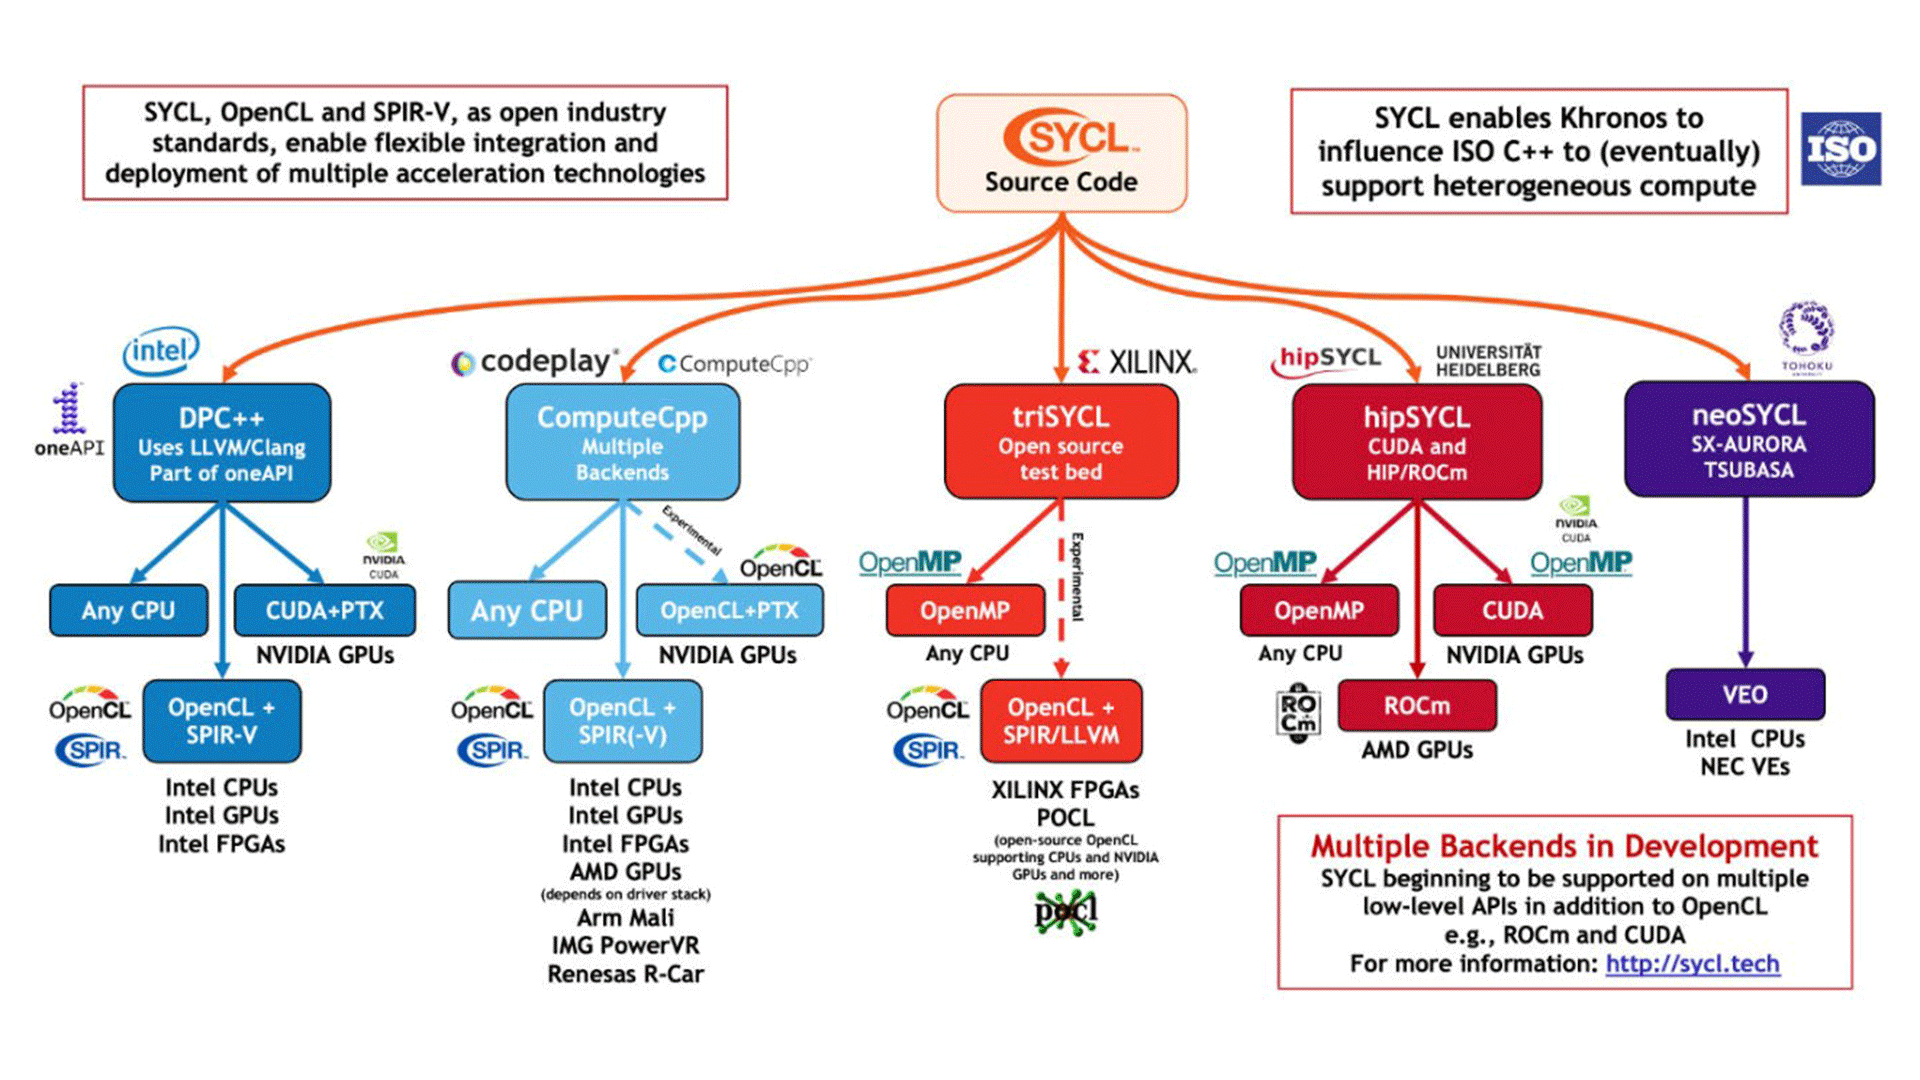

In [1]:
from IPython.display import Image
Image("https://www.intel.com/content/dam/www/central-libraries/us/en/images/2024-02/sycl-compilers-per-khronos-rwd.png")

## Recap on GPU programming models (30 min)

*Source: https://enccs.github.io/gpu-programming/*

Introduction to GPU programming models - https://enccs.github.io/gpu-programming/5-intro-to-gpu-prog-models/

**Read more**

Directive-based models - https://enccs.github.io/gpu-programming/6-directive-based-models/

Non-portable kernel-based models - https://enccs.github.io/gpu-programming/7-non-portable-kernel-models/

Portable kernel-based models - https://enccs.github.io/gpu-programming/8-portable-kernel-models/

High-level language support - https://enccs.github.io/gpu-programming/9-language-support/

## Exercise 1: Compute pi on the GPU (2 h)

<-- see `compute_pi.ipynb`

# Day 2 (2 h)

## Exercise 2: Simulating heat diffusion on the GPU (1 h)

<-- see `heat_eq_1d.ipynb`

## Julia (1 h)

*Sources: https://github.com/ENCCS/webinar_documents and https://github.com/ageron/julia_notebooks*

<-- see `Webinar_Julia.ipynb` for a Short tour of Julia for GPU programming and Machine Learning

<-- see `Julia_Colab_Notebook_Template.ipynb` for a templeta notebook to run Julia code in Colab runtimes